In [1]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

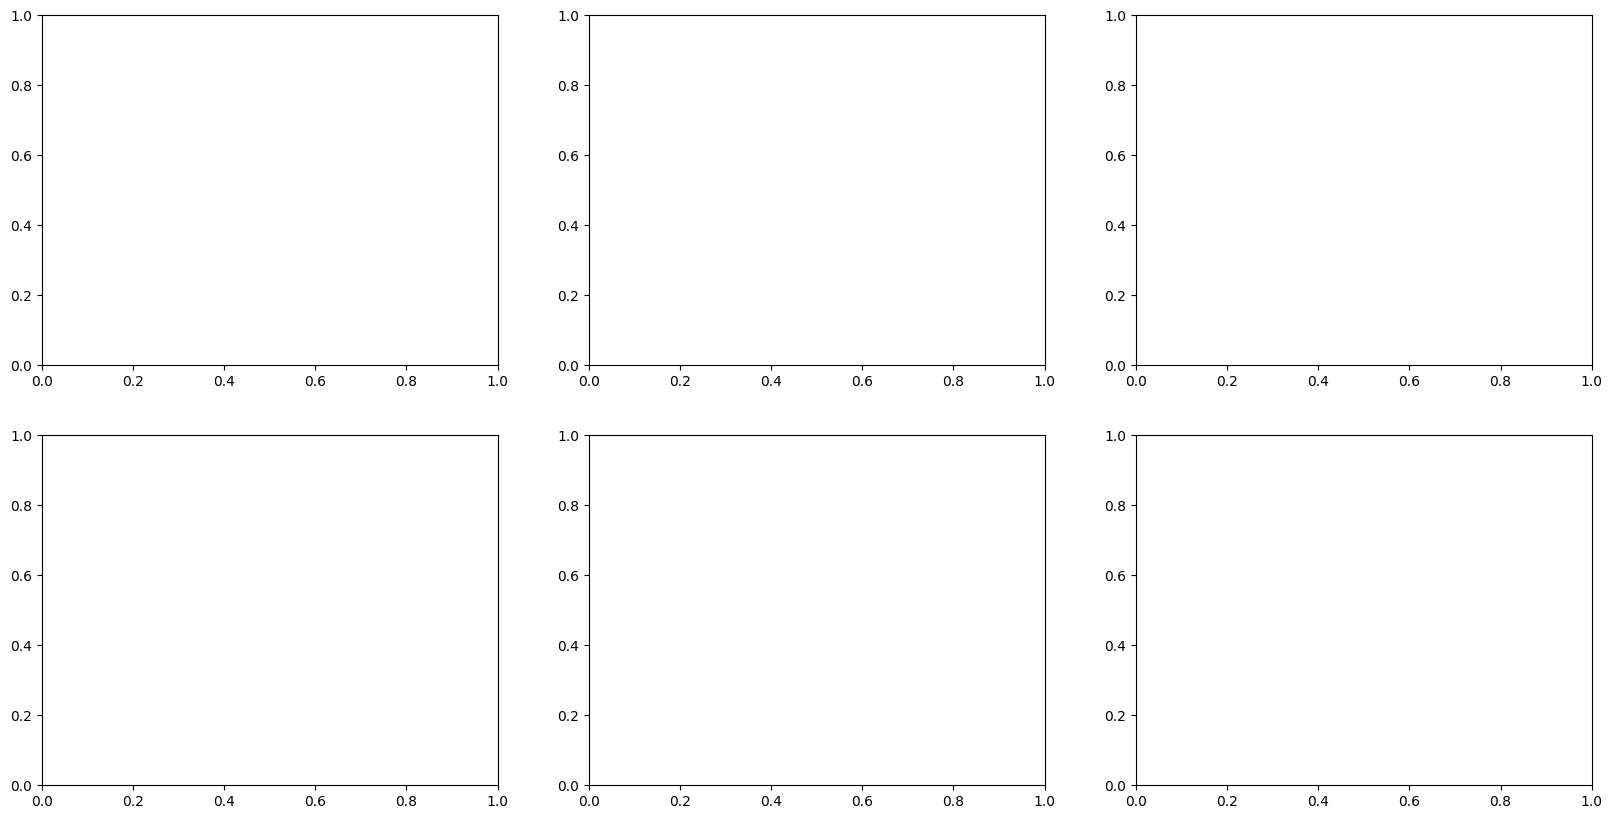

In [2]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

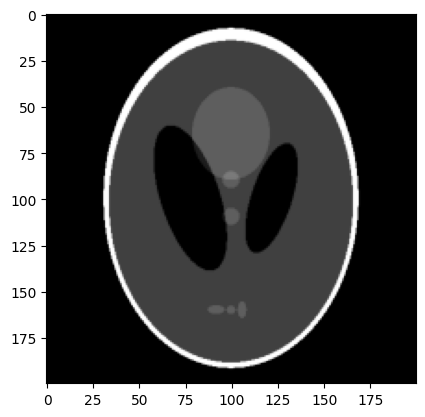

In [3]:
#Definition of the true object
activity_level = 0.1
true_object = shepp_logan_phantom()
true_object = rescale(activity_level*true_object, 0.5)
plt.imshow(true_object, cmap='Greys_r')

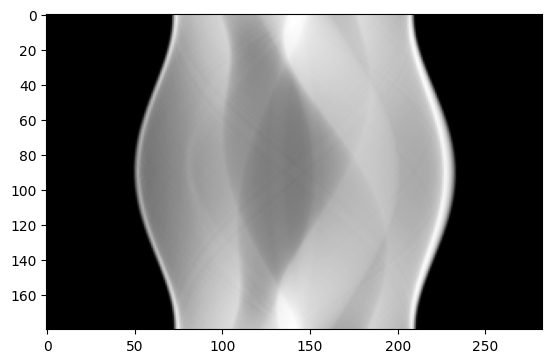

In [4]:
# Generate simulated sinogram data
azi_angles = np.linspace(0.0, 180.0, 180, endpoint=False)
sinogram = radon(true_object, azi_angles, circle=False)
plt.imshow(sinogram.T, cmap='Greys_r')

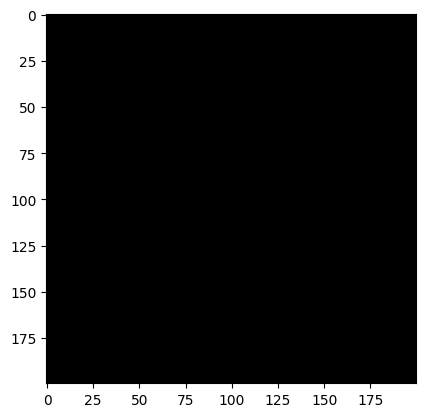

In [5]:
# Define image estimation at iteration zero
mlem_rec = np.ones(true_object.shape)
plt.imshow(mlem_rec, cmap='Greys_r')

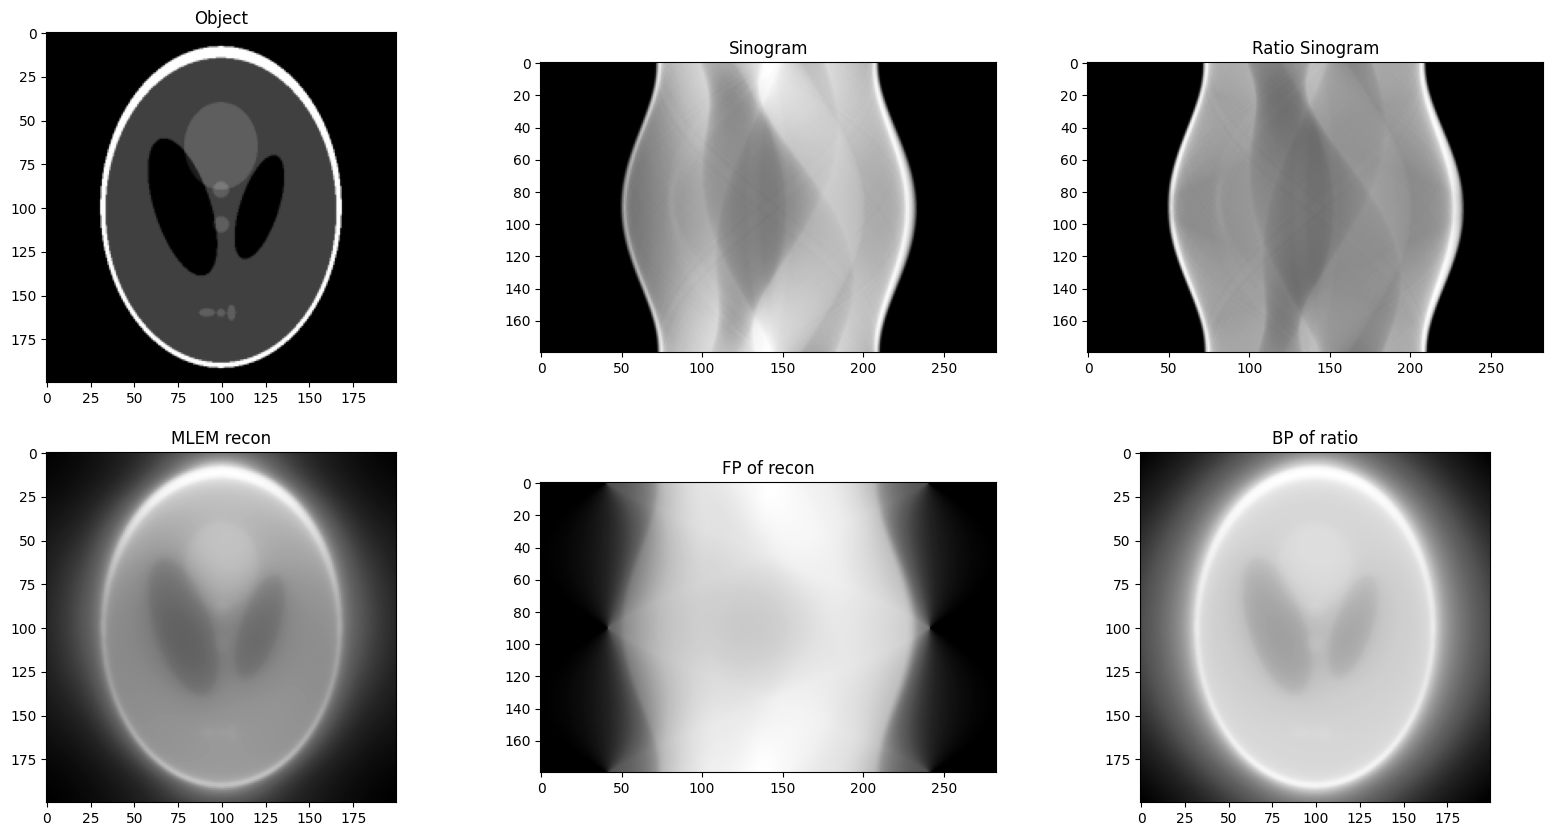

In [8]:
# one Iteration

fp = radon(mlem_rec, azi_angles, circle=False)  # Forward projection
ratio = sinogram / (fp + 0.000001)  # division (with safety offset in case of zero values)
correction = iradon(ratio, azi_angles, circle=False, filter_name=None) # backprojection

axs[0, 0].imshow(true_object, cmap='Greys_r');  axs[0, 0].set_title('Object')
axs[0, 1].imshow(sinogram.T, cmap='Greys_r');   axs[0, 1].set_title('Sinogram')
axs[0, 2].imshow(ratio.T, cmap='Greys_r');      axs[0, 2].set_title('Ratio Sinogram')
axs[1, 0].imshow(mlem_rec, cmap='Greys_r');   axs[1, 0].set_title('MLEM recon')
axs[1, 1].imshow(fp.T, cmap='Greys_r');         axs[1, 1].set_title('FP of recon')
axs[1, 2].imshow(correction, cmap='Greys_r');   axs[1, 2].set_title('BP of ratio')

mlem_rec = mlem_rec * correction
display(fig)